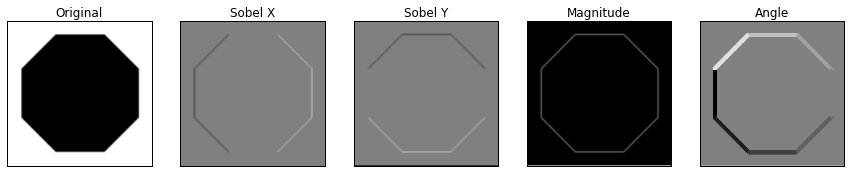

In [217]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy import ndimage

%matplotlib inline
img = cv2.imread('shape.png',0)
img=img/255.0
#laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelxx = ndimage.filters.sobel(img, axis=-1,mode='constant')
sobelx =cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3,borderType=cv2.BORDER_CONSTANT)
sobelyy = ndimage.filters.sobel(img, axis=0,mode='constant')#cv2.Sobel(img,cv2.CV_64F,0,1,ksize=1)
sobely =cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3,borderType=cv2.BORDER_CONSTANT )
plt.figure(figsize=(15,10))
plt.subplot(1,5,1),plt.imshow(img,cmap = 'gray');
plt.title('Original'), plt.xticks([]), plt.yticks([]);
plt.subplot(1,5,2),plt.imshow(sobelx,cmap = 'gray');
plt.title('Sobel X'), plt.xticks([]), plt.yticks([]);
plt.subplot(1,5,3),plt.imshow(sobely,cmap = 'gray');
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([]);

mag=np.hypot(sobelx,sobely) #cv2.magnitude(sobelx,sobely)
#mag *= 1.0 / np.max(mag) 
plt.subplot(1,5,4),plt.imshow(mag,cmap = 'gray');
plt.title('Magnitude'), plt.xticks([]), plt.yticks([]);
ph=scipy.arctan2(sobely,sobelx)*180.0/np.pi#cv2.phase(sobelx,sobely,angleInDegrees=True)
plt.subplot(1,5,5),plt.imshow(1-((ph+180.0)/360.0),cmap = 'gray');
plt.title('Angle'), plt.xticks([]), plt.yticks([]);


In [226]:
def select_gdir(gmag, gdir, mag_min, angle_low, angle_high):
    mask=(gdir>=angle_low);
    m=np.asarray(mask,np.float32)
  
    res=gdir*m
    mask1=(res<=angle_high)
    m1=np.asarray(mask1,np.float32)
    res1=res*m1
    mask2=gmag>=mag_min
 
    m2=np.asarray(mask2,np.float32)
    res2=m2*res1

    return res2
 

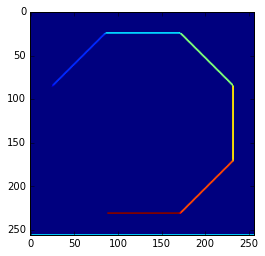

In [242]:
i=select_gdir(mag,((ph+180)),1,0,270)
plt.imshow(i)

In [220]:
f=open('c.txt')
s=f.readlines()
cnt=0
for strs in s:
    cnt+=1
    #print strs.replace("  "+str(cnt)+" ",'')

In [124]:


sobelx

array([[ 3.,  0.,  0., ...,  0.,  0., -3.],
       [ 4.,  0.,  0., ...,  0.,  0., -4.],
       [ 4.,  0.,  0., ...,  0.,  0., -4.],
       ..., 
       [ 4.,  0.,  0., ...,  0.,  0., -4.],
       [ 4.,  0.,  0., ...,  0.,  0., -4.],
       [ 3.,  0.,  0., ...,  0.,  0., -3.]])

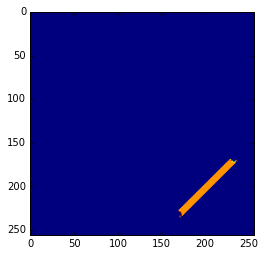

In [191]:

plt.imshow(gdir1)

In [50]:
ph.max()

180.0

In [66]:
img

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [73]:
mag.max()

0.38266955217154341

In [23]:
im=np.ones((3,3),dtype=np.float64)


In [16]:
im

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [17]:
im[1,1]=1
im

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.]])

In [19]:
sobel = cv2.Sobel(im,cv2.CV_8U,1,0,ksize=3)

In [28]:
cv2.Sobel(im,cv2.CV_64F,0,1,ksize=1)

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

4.0

In [120]:
cv2.getDerivKernels(1,0,3,normalize = False,ktype = cv2.CV_32F)

(array([[-1.],
        [ 0.],
        [ 1.]], dtype=float32), array([[ 1.],
        [ 2.],
        [ 1.]], dtype=float32))

In [152]:
m=(ph+180.0)

In [153]:
m.max()

360.0